In [14]:
import pandas as pd
import pandas as pd
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 11.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=d3865fc2fda36b6d3d13f73eba5c726c35dad767ee9e8d55e8790877f0c81da5
  Stored in directory: /home/crescom/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
Successfully built pyLDAvis
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install gensim

     |████████████████████████████████| 24.1 MB 10.6 MB/s eta 0:00:01    |██████▋                         | 5.0 MB 10.7 MB/s eta 0:00:02
     |████████████████████████████████| 58 kB 4.1 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud

     |████████████████████████████████| 371 kB 11.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
# 텍스트 데이터를 데이터프레임으로 불러옴, 구분자는 \t 

#ori_20_22 = pd.read_table('/Users/iyunhan/Desktop/HyundaiMobis/COMPLAINTS_RECEIVED_2020-2022.txt', sep='\t')
#ori_15_19 = pd.read_table('/Users/iyunhan/Desktop/HyundaiMobis/COMPLAINTS_RECEIVED_2015-2019.txt', sep='\t')
#ori_10_14 = pd.read_table('/Users/iyunhan/Desktop/HyundaiMobis/COMPLAINTS_RECEIVED_2010-2014.txt', sep='\t')

/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,33,38,41,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15,16,18,28,41,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (41,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [53]:
'''
A = list(ori_20_22.columns)  # 처음 데이터의 column명이 존재하지 않음
ori_20_22.loc[len(ori_20_22)] = A # 컬럼명이 데이터이므로 데이터에 포함시켜줌 

B = list(ori_15_19.columns)  # 처음 데이터의 column명이 존재하지 않음
ori_15_19.loc[len(ori_15_19)] = B # 컬럼명이 데이터이므로 데이터에 포함시켜줌 

C = list(ori_10_14.columns)  # 처음 데이터의 column명이 존재하지 않음
ori_10_14.loc[len(ori_10_14)] = C # 컬럼명이 데이터이므로 데이터에 포함시켜줌 
'''

In [55]:
'''
ori_data1 = pd.DataFrame(data = ori_20_22)# 컬럼명 0,1,2 ... 48로 만들었음 
ori_data1.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
         ,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]

ori_data2 = pd.DataFrame(data = ori_15_19)
ori_data2.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
         ,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]

ori_data3 = pd.DataFrame(data = ori_10_14)
ori_data3.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
         ,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
'''

In [62]:
'''
ori_data = pd.concat([ori_data1, ori_data2])
ori_data = pd.concat([ori_data, ori_data3])
ori_data
'''

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1633288,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,1633289,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,1633290,11292385,Ford Motor Company,FORD,EXPLORER,2020.0,N,20191226,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,1633291,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,1633292,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392943,1143621,10734188,Ford Motor Company,FORD,F-450 SD,2012.0,N,20141111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
392944,1143622,10734193,"General Motors, LLC",CHEVROLET,MALIBU,2007.0,N,20100111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
392945,1143623,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
392946,1143624,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [63]:
'''
ori_data.reset_index(drop = True, inplace = True) # 인덱스를 초기화 해줌 
ori_data
'''

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1633288,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,1633289,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,1633290,11292385,Ford Motor Company,FORD,EXPLORER,2020.0,N,20191226,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,1633291,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,1633292,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054596,1143621,10734188,Ford Motor Company,FORD,F-450 SD,2012.0,N,20141111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054597,1143622,10734193,"General Motors, LLC",CHEVROLET,MALIBU,2007.0,N,20100111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054598,1143623,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054599,1143624,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [16]:
ori_data = pd.read_csv('/home/crescom/pythonwork/labeling/nhtsa/10_22_Data.csv/10_22_Data.csv')
ori_data

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-415e10b41cd8>:1: DtypeWarning: Columns (16,17,18,19,23,27,29,34,38,39,42,45) have mixed types. Specify dtype option on import or set low_memory=False.
  ori_data = pd.read_csv('/home/crescom/pythonwork/labeling/nhtsa/10_22_Data.csv/10_22_Data.csv')


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,0,1633288,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,1,1633289,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,2,1633290,11292385,Ford Motor Company,FORD,EXPLORER,2020.0,N,20191226,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,3,1633291,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,4,1633292,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054596,1054596,1143621,10734188,Ford Motor Company,FORD,F-450 SD,2012.0,N,20141111,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054597,1054597,1143622,10734193,"General Motors, LLC",CHEVROLET,MALIBU,2007.0,N,20100111,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054598,1054598,1143623,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054599,1054599,1143624,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [19]:
# 대부분 사고가 나지 않았을 때 접수된 불만사항 
ori_data['6'].value_counts()

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


N    993653
Y     60947
6         1
Name: 6, dtype: int64

In [21]:
ori_data_hyun = ori_data[ori_data['3'] == 'HYUNDAI'] # 현대자동차들 
ori_data_hyun

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
8,8,1633296,11292389,Hyundai Motor America,HYUNDAI,AZERA,2015.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
9,9,1633297,11292389,Hyundai Motor America,HYUNDAI,AZERA,2015.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
10,10,1633298,11292389,Hyundai Motor America,HYUNDAI,AZERA,2015.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
50,50,1633338,11292416,Hyundai Motor America,HYUNDAI,SANTA FE,2007.0,N,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
74,74,1633362,11292430,Hyundai Motor America,HYUNDAI,SANTA FE SPORT,2017.0,Y,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054432,1054432,1143457,10669333,Hyundai Motor America,HYUNDAI,SONATA,2008.0,N,20141201,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054437,1054437,1143462,10669336,Hyundai Motor America,HYUNDAI,SONATA,2011.0,N,20140602,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054487,1054487,1143512,10669369,Hyundai Motor America,HYUNDAI,TUCSON,2014.0,N,20141210,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054525,1054525,1143550,10669396,Hyundai Motor America,HYUNDAI,GENESIS,2012.0,N,20141209,N,...,NaN,RUSAK MOTORS LTD,NaN,CLEVELAND,OH,44105.0,V,NaN,N,N


In [22]:
ori_data_kia = ori_data[ori_data['3'] == 'KIA'] # 기아자동차들 
ori_data_kia

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
11,11,1633299,11292390,Kia Motors America,KIA,SOUL,2020.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
12,12,1633300,11292390,Kia Motors America,KIA,SOUL,2020.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
223,223,1633511,11292531,Kia Motors America,KIA,OPTIMA,2016.0,N,20191227,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
239,239,1633527,11292545,Kia Motors America,KIA,OPTIMA,2011.0,N,20190601,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
260,260,1633548,11292568,Kia Motors America,KIA,FORTE,2018.0,N,20190822,N,...,NaN,KIA AUTOSPORT OF PENSACOLA,NaN,PENSACOLA,FL,32505.0,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054495,1054495,1143520,10669376,Kia Motors America,KIA,SEDONA,2006.0,N,20071203,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054496,1054496,1143521,10669376,Kia Motors America,KIA,SEDONA,2006.0,N,20071203,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054502,1054502,1143527,10669382,Kia Motors America,KIA,SORENTO,2013.0,N,20141215,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054510,1054510,1143535,10669377,Kia Motors America,KIA,RIO,2013.0,N,20141231,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [23]:
ori_data_korea = pd.concat([ori_data_hyun, ori_data_kia])
ori_data_korea.reset_index(drop = True, inplace = True)
ori_data_korea

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,8,1633296,11292389,Hyundai Motor America,HYUNDAI,AZERA,2015.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,9,1633297,11292389,Hyundai Motor America,HYUNDAI,AZERA,2015.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,10,1633298,11292389,Hyundai Motor America,HYUNDAI,AZERA,2015.0,N,20200101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,50,1633338,11292416,Hyundai Motor America,HYUNDAI,SANTA FE,2007.0,N,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,74,1633362,11292430,Hyundai Motor America,HYUNDAI,SANTA FE SPORT,2017.0,Y,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67660,1054495,1143520,10669376,Kia Motors America,KIA,SEDONA,2006.0,N,20071203,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
67661,1054496,1143521,10669376,Kia Motors America,KIA,SEDONA,2006.0,N,20071203,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
67662,1054502,1143527,10669382,Kia Motors America,KIA,SORENTO,2013.0,N,20141215,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
67663,1054510,1143535,10669377,Kia Motors America,KIA,RIO,2013.0,N,20141231,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [24]:
ori_data_korea['4'].value_counts()

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SONATA           14782
SORENTO           7977
ELANTRA           6348
OPTIMA            5971
SANTA FE          5887
                 ...  
XG300L               2
TUCSON HYBRID        2
92102-3L050          1
92102-0A000          1
NIRO PHEV            1
Name: 4, Length: 79, dtype: int64

In [25]:
ori_sonata = ori_data_korea[ori_data_korea['4'] == 'SONATA']
ori_sonata

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
6,97,1633385,11292446,Hyundai Motor America,HYUNDAI,SONATA,2016.0,N,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7,105,1633393,11292450,Hyundai Motor America,HYUNDAI,SONATA,2013.0,N,20191231,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
9,130,1633418,11292469,Hyundai Motor America,HYUNDAI,SONATA,2015.0,N,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
15,205,1633493,11289436,Hyundai Motor America,HYUNDAI,SONATA,2018.0,Y,20191105,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,Y
17,226,1633514,11292536,Hyundai Motor America,HYUNDAI,SONATA,2017.0,N,20200102,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39889,1054333,1143358,10669275,Hyundai Motor America,HYUNDAI,SONATA,2004.0,Y,20141111,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
39890,1054334,1143359,10669275,Hyundai Motor America,HYUNDAI,SONATA,2004.0,Y,20141111,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
39897,1054431,1143456,10669333,Hyundai Motor America,HYUNDAI,SONATA,2008.0,N,20141201,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
39898,1054432,1143457,10669333,Hyundai Motor America,HYUNDAI,SONATA,2008.0,N,20141201,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [26]:
# 사고가 발생하지 않았는데 불만이 생김 
ori_sonata_N = ori_sonata[ori_sonata['6'] == 'N']
ori_sonata_N.reset_index(drop = True, inplace = True)
ori_sonata_N

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,97,1633385,11292446,Hyundai Motor America,HYUNDAI,SONATA,2016.0,N,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,105,1633393,11292450,Hyundai Motor America,HYUNDAI,SONATA,2013.0,N,20191231,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,130,1633418,11292469,Hyundai Motor America,HYUNDAI,SONATA,2015.0,N,20191230,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,226,1633514,11292536,Hyundai Motor America,HYUNDAI,SONATA,2017.0,N,20200102,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,227,1633515,11292536,Hyundai Motor America,HYUNDAI,SONATA,2017.0,N,20200102,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14016,1054208,1143233,10669190,Hyundai Motor America,HYUNDAI,SONATA,2011.0,N,20141224,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
14017,1054209,1143234,10669190,Hyundai Motor America,HYUNDAI,SONATA,2011.0,N,20141224,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
14018,1054431,1143456,10669333,Hyundai Motor America,HYUNDAI,SONATA,2008.0,N,20141201,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
14019,1054432,1143457,10669333,Hyundai Motor America,HYUNDAI,SONATA,2008.0,N,20141201,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [33]:
ori_sonata_N['19']

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        USED CAR WITH 86,000 MILES ON IT. ON THE 90TH ...
1        WE HAVE REPLACED THE BACK BRAKE LIGHT BULBS MU...
2        WHILE I WAS TRAVELING ALONG A RURAL ROAD AT AP...
3        ON NOVEMBER 23, 2019 I STARTED MY CAR AND PROC...
4        ON NOVEMBER 23, 2019 I STARTED MY CAR AND PROC...
                               ...                        
14016    OIL LIGHT BLINKED ON AND OFF TWICE.  CAR WAS M...
14017    OIL LIGHT BLINKED ON AND OFF TWICE.  CAR WAS M...
14018    2008 HYUNDAI SONATA : RECEIVED RECALL FOR PASS...
14019    2008 HYUNDAI SONATA : RECEIVED RECALL FOR PASS...
14020    TL* THE CONTACT OWNS A 2011 HYUNDAI SONATA. TH...
Name: 19, Length: 14021, dtype: object

In [36]:
#%% 중복제거 및 리뷰 추출

# 중복제거
#Unique_compdesc_yeartxt_modeltxt = compdesc_yeartxt_modeltxt.drop_duplicates(subset=['ODINO'])

# 리뷰 추출
Unori_sonata_N_txt = list(ori_sonata_N['19'].values)

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#%%                
stoplist = [',','\n','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# 불용어 처리
texts = [[word for word in document.split() if word.lower() not in stoplist]
        for document in Unori_sonata_N_txt]

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#%%
# 단어사전 만들기
dictionary = corpora.Dictionary(texts)     
#%%
# 단어사전이 잘 만들어졌나? 확인용
for i in dictionary.items():
        print(i)
        
corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)
#print('corpus : {}'.format(corpus))

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '2011-2018')
(1, '2019')
(2, '2020.')
(3, '6TH')
(4, '86,000')
(5, '90')
(6, '90TH')
(7, 'ABUNDANT')
(8, 'ACCIDENTS')
(9, 'ACTION')
(10, 'AFFECTED.')
(11, 'ALONG')
(12, 'ALREADY')
(13, 'ANTICIPATING')
(14, 'APPARENT.')
(15, 'BECAME')
(16, 'BLAMING')
(17, 'BLOWN.')
(18, 'BRUSH')
(19, 'BURDEN')
(20, 'BUYING')
(21, 'CAR')
(22, 'CARELESS')
(23, 'CARS')
(24, 'CARS.')
(25, 'CATASTROPHIC.')
(26, 'CLASS')
(27, 'CLEARLY')
(28, 'CONSUMERS')
(29, 'COST')
(30, "COULD'VE")
(31, 'DAYS')
(32, 'DEALERSHIP')
(33, 'DEALERSHIP,')
(34, 'DESPITE')
(35, 'DETERMINED')
(36, 'ENGINE')
(37, 'ENGINES.')
(38, 'ENSURE')
(39, 'FAULTY')
(40, 'FINANCIAL')
(41, 'FIRES.')
(42, 'FIX')
(43, 'FOUND')
(44, 'FREEWAY,')
(45, 'HARM')
(46, 'HELP')
(47, 'HYUNDAI')
(48, "I'M")
(49, 'INCLUDED')
(50, 'INCLUDING')
(51, 'ISSUES')
(52, 'IT.')
(53, 'JANUARY,')
(54, 'KIA')
(55, 'KNOWINGLY')
(56, 'KNOWLEDGE')
(57, 'LAWSUIT')
(58, 'LOOKING')
(59, 'MADE.')
(60, 'MANY')
(61, 'MECHANIC,')
(62, 'MILES')
(63, 'MISTAKES')
(64, 'NEED')
(65,

In [43]:
#-----------------------------------------------------------------

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=5, random_state = 1)                   # 모델구축

for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
	print(t)

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.034*"CAR" + 0.027*"OIL" + 0.013*"HYUNDAI" + 0.010*"ENGINE" + 0.010*"KNOCKING" + 0.010*"SOUND" + 0.008*"PROBLEMS" + 0.008*"*TR" + 0.007*"INDICATION" + 0.007*"RECALL"')
(1, '0.037*"STEERING" + 0.025*"*TR" + 0.022*"SONATA" + 0.021*"HYUNDAI" + 0.019*"INFORMATION" + 0.016*"WHEEL" + 0.014*"LEFT" + 0.012*"CAR" + 0.010*"PROBLEM." + 0.010*"ACT"')
(2, '0.042*"HYUNDAI" + 0.026*"VEHICLE" + 0.015*"NHTSA" + 0.014*"DEALER" + 0.013*"AIR" + 0.013*"CONTACT" + 0.011*"SONATA." + 0.011*"BAG" + 0.011*"FAILURE" + 0.010*"RECALL"')
(3, '0.027*"CAR" + 0.020*"LIGHT" + 0.012*"PASSENGER" + 0.010*"*TR" + 0.010*"HYUNDAI" + 0.009*"SEAT" + 0.008*"ISSUE" + 0.008*"AIR" + 0.007*"BAG" + 0.006*"SONATA"')
(4, '0.054*"VEHICLE" + 0.038*"CONTACT" + 0.029*"FAILURE" + 0.019*"MANUFACTURER" + 0.019*"MILEAGE" + 0.018*"REPAIRED." + 0.018*"TAKEN" + 0.018*"HYUNDAI" + 0.017*"SONATA." + 0.016*"OWNS"')


In [44]:
prepared_data = gensimvis.prepare(lda, corpus, dictionary)

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/crescom/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [45]:
pyLDAvis.display(prepared_data)

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 차종마다 차이가 있을까? 

In [73]:
ori_sorento = ori_data[ori_data['4'] == 'SORENTO']

# 사고가 발생하지 않았는데 불만이 생김 
ori_sorento_N = ori_sorento[ori_sorento['6'] == 'N']
ori_sorento_N.reset_index(drop = True, inplace = True)
ori_sorento_N

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,401,1633689,11296685,Kia Motors America,KIA,SORENTO,2013.0,N,20191231,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,421,1633709,11296696,Kia Motors America,KIA,SORENTO,2014.0,N,20191214,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,485,1633773,11296732,Kia Motors America,KIA,SORENTO,2018.0,N,20191209,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,545,1633833,11296781,Kia Motors America,KIA,SORENTO,2014.0,N,20160101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,546,1633834,11296781,Kia Motors America,KIA,SORENTO,2014.0,N,20160101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,1053156,1142181,10668431,Kia Motors America,KIA,SORENTO,2013.0,N,20141223,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7656,1053157,1142182,10668431,Kia Motors America,KIA,SORENTO,2013.0,N,20141223,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7657,1053852,1142877,10668904,Kia Motors America,KIA,SORENTO,2006.0,N,20141229,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7658,1054502,1143527,10669382,Kia Motors America,KIA,SORENTO,2013.0,N,20141215,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [78]:
aaa = ori_sorento_N[ori_sorento_N['19'].isnull()]
aaa

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48


In [77]:
ori_sorento_N = ori_sorento_N.drop(2723, axis=0)
ori_sorento_N.reset_index(drop = True, inplace = True)
ori_sorento_N


/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,401,1633689,11296685,Kia Motors America,KIA,SORENTO,2013.0,N,20191231,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,421,1633709,11296696,Kia Motors America,KIA,SORENTO,2014.0,N,20191214,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,485,1633773,11296732,Kia Motors America,KIA,SORENTO,2018.0,N,20191209,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,545,1633833,11296781,Kia Motors America,KIA,SORENTO,2014.0,N,20160101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,546,1633834,11296781,Kia Motors America,KIA,SORENTO,2014.0,N,20160101,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,1053156,1142181,10668431,Kia Motors America,KIA,SORENTO,2013.0,N,20141223,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7655,1053157,1142182,10668431,Kia Motors America,KIA,SORENTO,2013.0,N,20141223,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7656,1053852,1142877,10668904,Kia Motors America,KIA,SORENTO,2006.0,N,20141229,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7657,1054502,1143527,10669382,Kia Motors America,KIA,SORENTO,2013.0,N,20141215,N,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [79]:
ori_sorento_N_txt = list(ori_sorento_N['19'].values)

#%%                
stoplist = [',','\n','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# 불용어 처리
texts = [[word for word in document.split() if word.lower() not in stoplist]
        for document in ori_sorento_N_txt]

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
texts

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['DRIVING',
  'INTERSTATE',
  'FAMILY',
  'FOUR,',
  'ENGINE',
  'SEIZED',
  'WITHOUT',
  'WARNING.',
  'TAKING',
  'RAMP',
  'ONE',
  'INTERSTATE',
  'MERGE',
  'ONTO',
  'ANOTHER',
  'POWER.',
  'LUCKILY',
  'LANE',
  'CLOSEST',
  'SHOULDER',
  'ALREADY',
  'FAR',
  'LEFT',
  'FAST',
  'LANE',
  'LITTLE',
  'ROOM',
  'SAFELY',
  'GET',
  'TRAFFIC.',
  'MECHANIC',
  'NOTED',
  'ADEQUATE',
  'CLEAN',
  'OIL.',
  'COST',
  '$7,000',
  'REPLACE',
  'ENGINE.',
  'THOUGH',
  'KIA',
  'RECALL',
  'ENGINES,',
  'ONE',
  '(YET)',
  'PART',
  'RECALL.'],
 ['ENGINE',
  'OIL',
  'BURNOUT',
  '-',
  'WITHIN',
  '3',
  'WEEKS',
  'FRESH',
  'OIL',
  'CHANGE',
  'OIL',
  'COMPLETELY',
  'BURNED',
  'CRANK',
  'CASE',
  '/',
  '2',
  'OIL',
  'CHANGES',
  'PERFORMED',
  'WITHIN',
  '3',
  'WEEKS',
  'OIL',
  'LEAKS',
  'SMOKE',
  'EXHAUST',
  'VEHICLE',
  'MOTION',
  'IMMEDIATELY',
  'HERD',
  'KNOCK',
  'PULLED',
  'SHUT',
  'VEHICLE',
  'MAJOR',
  'DAMAGES',
  'COULD',
  'OCCUR'],
 ['STEERING',
 

In [81]:

#%%
# 단어사전 만들기
dictionary = corpora.Dictionary(texts)     
#%%
# 단어사전이 잘 만들어졌나? 확인용
for i in dictionary.items():
        print(i)
        
corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)

#-----------------------------------------------------------------

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=5, random_state = 1)                   # 모델구축

for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
	print(t)
    
prepared_data = gensimvis.prepare(lda, corpus, dictionary)

pyLDAvis.display(prepared_data)

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '$7,000')
(1, '(YET)')
(2, 'ADEQUATE')
(3, 'ALREADY')
(4, 'ANOTHER')
(5, 'CLEAN')
(6, 'CLOSEST')
(7, 'COST')
(8, 'DRIVING')
(9, 'ENGINE')
(10, 'ENGINE.')
(11, 'ENGINES,')
(12, 'FAMILY')
(13, 'FAR')
(14, 'FAST')
(15, 'FOUR,')
(16, 'GET')
(17, 'INTERSTATE')
(18, 'KIA')
(19, 'LANE')
(20, 'LEFT')
(21, 'LITTLE')
(22, 'LUCKILY')
(23, 'MECHANIC')
(24, 'MERGE')
(25, 'NOTED')
(26, 'OIL.')
(27, 'ONE')
(28, 'ONTO')
(29, 'PART')
(30, 'POWER.')
(31, 'RAMP')
(32, 'RECALL')
(33, 'RECALL.')
(34, 'REPLACE')
(35, 'ROOM')
(36, 'SAFELY')
(37, 'SEIZED')
(38, 'SHOULDER')
(39, 'TAKING')
(40, 'THOUGH')
(41, 'TRAFFIC.')
(42, 'WARNING.')
(43, 'WITHOUT')
(44, '-')
(45, '/')
(46, '2')
(47, '3')
(48, 'BURNED')
(49, 'BURNOUT')
(50, 'CASE')
(51, 'CHANGE')
(52, 'CHANGES')
(53, 'COMPLETELY')
(54, 'COULD')
(55, 'CRANK')
(56, 'DAMAGES')
(57, 'EXHAUST')
(58, 'FRESH')
(59, 'HERD')
(60, 'IMMEDIATELY')
(61, 'KNOCK')
(62, 'LEAKS')
(63, 'MAJOR')
(64, 'MOTION')
(65, 'OCCUR')
(66, 'OIL')
(67, 'PERFORMED')
(68, 'PULLED')
(69

/home/crescom/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [82]:
pyLDAvis.display(prepared_data)

/home/crescom/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-121-7a7a7ff138f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ori_sonata[7] = ori_sonata[7].astype('str')
<ipython-input-121-7a7a7ff138f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ori_sonata[7] = pd.to_datetime(ori_sonata[7])


<AxesSubplot:title={'center':'Sonata COMPLAINTS'}>

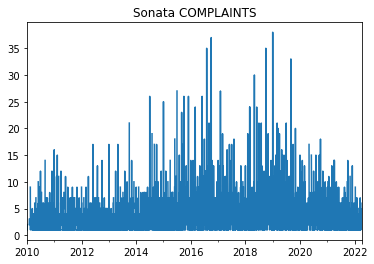

In [121]:
# 소나타 불만 날짜 시각화
from datetime import datetime
from datetime import timedelta

ori_sonata = ori_sonata_N

ori_sonata[7] = ori_sonata[7].astype('str')
ori_sonata[7] = pd.to_datetime(ori_sonata[7])

# 시각화
idx = pd.date_range("2010-1-1", "2022-04-06", freq="D")

sonata_date = ori_sonata[7].value_counts()

series_ts3 = pd.Series(sonata_date, index=idx)
series_ts3.plot(title = 'Sonata COMPLAINTS')

<ipython-input-122-fe02501a2191>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ori_sonata[7] = ori_sonata[7].astype('str')
<ipython-input-122-fe02501a2191>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ori_sonata[7] = pd.to_datetime(ori_sonata[7])


<AxesSubplot:title={'center':'Sonata COMPLAINTS'}>

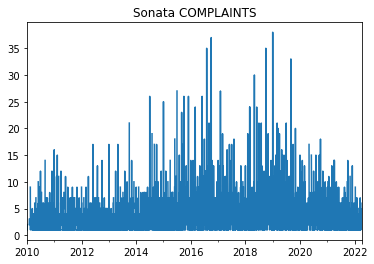

In [122]:
# 소나타 불만 날짜 시각화
from datetime import datetime
from datetime import timedelta

ori_sonata[7] = ori_sonata[7].astype('str')
ori_sonata[7] = pd.to_datetime(ori_sonata[7])

# 시각화
idx = pd.date_range("2010-1-1", "2022-04-06", freq="D")

sonata_date = ori_sonata[7].value_counts()

series_ts3 = pd.Series(sonata_date, index=idx)
series_ts3.plot(title = 'Sonata COMPLAINTS')

In [125]:
ori_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1633288,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,1633289,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,1633290,11292385,Ford Motor Company,FORD,EXPLORER,2020.0,N,20191226,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,1633291,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,1633292,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054596,1143621,10734188,Ford Motor Company,FORD,F-450 SD,2012.0,N,20141111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054597,1143622,10734193,"General Motors, LLC",CHEVROLET,MALIBU,2007.0,N,20100111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054598,1143623,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1054599,1143624,10734194,Toyota Motor Corporation,TOYOTA,RAV4,2007.0,N,20140801,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [127]:
ori_data.to_csv('/Users/iyunhan/Desktop/HyundaiMobis/10_22_Data.csv')